![](fig/univ.png)

# AI-1: ML/AI Basics
## Homework 2: Regression Modeling and Logistic Regression Classification

**AI1 Cohort 2**<br/>
**Univ.AI**<br/>
**Instructor**: Pavlos Protopapas, Ignacio Becker<br/>
**Maximum Score**: 100 + 5 (Extra Points)

<hr style="height:2.4pt">

**Name of the people who have worked on the homework:**


### Table of Contents
* [Instructions](#instructions)
* [Part A: Predicting percentage change in multiple bacteria populations given their spreading factor](#partA)
    * [Q1: Data Visualization](#partAQ1)
    * [Q2: Use k-fold cross validation along with Bootstraps to find the best degree](#partAQ2)
    * [Q3: Improving model consistency](#partAQ3)
* [Part B: Racial bias in machine learning systems](#partB)
    * [Q1: Setting up the problem and understanding the data](#partBQ1)
    * [Q2: Baseline model fitting](#partBQ2)
    * [Q3: 'Race'less model fitting](#partBQ3)
    * [Q4: Receiver Operating Characteristic curve](#partBQ4)    
* [Part C: Come up with a better model](#partC)

<hr style="height:2pt">

### Instructions <a class="anchor" id="instructions"></a>


- This homework is a jupyter notebook. Download and work on it in your local machine.

- This homework should be submitted in pairs.

- Ensure you and your partner together have submitted the homework only once. Multiple submissions of the same work will be penalised and will cost you 2 points.

- Please restart the kernel and run the entire notebook again before you submit.

- Running cells out of order is a common pitfall in Jupyter Notebooks. To make sure your code works restart the kernel and run the whole notebook again before you submit. 

- To submit the homework, either one of you upload the working notebook on edStem and click the submit button on the bottom right corner.

- Submit the homework well before the given deadline. Submissions after the deadline will not be graded.

- We have tried to include all the libraries you may need to do the assignment in the imports statement at the top of this notebook. We strongly suggest that you use those and not others as we may not be familiar with them.

- Comment your code well. This would help the graders in case there is any issue with the notebook while running. It is important to remember that the graders will not troubleshoot your code. 

- Please use .head() when viewing data. Do not submit a notebook that is **excessively long**. 

- In questions that require code to answer, such as "calculate the $R^2$", do not just output the value from a cell. Write a `print()` function that includes a reference to the calculated value, **not hardcoded**. For example: 
```
print(f'The R^2 is {R:.4f}')
```
- Your plots should include clear labels for the $x$ and $y$ axes as well as a descriptive title ("MSE plot" is not a descriptive title; "95 % confidence interval of coefficients of polynomial degree 5" is).

- **Ensure you make appropriate plots for all the questions it is applicable to, regardless of it being explicitly asked for.**

<hr style="height:2pt">

In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Import libraries
%matplotlib inline
import math
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, mean_squared_error as MSE
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
sns.set()
import random

import warnings

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">
<h1>Part A: Predicting percentage change in multiple bacteria populations given their spreading factor</h1> <a class="anchor" id="partA"></a>

### [40 points]
**Overview and Data Description**
    
In this part of the homework, we will explore polynomial regression for 
predicting a quantitative variable. Specifically, we will build 
regression models that can predict the percentage change in 
bacteria population after 4 hours based on their spreading factor. 
These prediction models can be useful in clustering of a novel bacteria to any class. 

If the percentage of change in population increases this indicates 
that the size of the bacteria population is growing. 
One important factor to note is that the percentage change could be negative. 
This indicates that within the specified time frame, 
the population of the bacteria decreases from the original size.

The data set for this problem has already been split for you. You will find the train and test data sets in the files `data/bacteria_train.csv` and `data/bacteria_test.csv`, respectively. The first column in each file contains the spreading factor of bacteria populations and the second column gives information about the change in percentage of the population. 



**Problem Description**

Given the bacteria data, we will try to predict the percentage change 
in population giving the spreading factor. 
Based on the data visualisation we can see that there seems to be a 
non-linear relationship between the 2 variables. For this exercise we 
will consider the `Spreading_factor` to be our predictor variable 
and `Perc_population` to be our response variable. 
We will fit a polynomial regression model for a specified degree on the 
training set and evaluate it on the test set. 
The performance of the models should be evaluated using their $MSE$.

In [3]:
import os
work_dir = os.getcwd()
print(work_dir)
path = work_dir

/content


In [4]:
# df_train = pd.read_csv(path + '/data/bacteria_train.csv')
# df_test = pd.read_csv(path + '/data/bacteria_test.csv')
df_train = pd.read_csv('/content/drive/MyDrive/Colab files/AI - 1/HW - 2/bacteria_train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Colab files/AI - 1/HW - 2/bacteria_test.csv')

# df_train = pd.read_csv('/content/drive/MyDrive/AI_1/hw2/bacteria_train.csv')
# df_test = pd.read_csv('/content/drive/MyDrive/AI_1/hw2/bacteria_test.csv')

In [5]:
print(f'Train shape --> {df_train.shape}')
print(f'Test shape --> {df_test.shape}')
df_train.head()

Train shape --> (423, 2)
Test shape --> (108, 2)


,Perc_population,Spreading_factor
0,1.535,0.190708
1,5.555,0.326928
2,-0.277,-0.459699
3,1.724,-0.193013
4,-0.550,-0.835745


<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

<b> Question 1:   Data Visualization [3 points]</b> <a class="anchor" id="partAQ1"></a>
    <br /><br />
**1.1** [2 pts] Generate a scatter plot of the data points in the `bacteria_train.csv` 
file with the `Spreading factor` on the $X$-axis and the `Percentage` 
change on the $Y$-axis. Make sure you clearly label the $x$ and $y$ axes and include proper title. 
<br /><br />
**1.2** [1 pts] Based on the graph, is there any discernable relationship between 
the spreading factor and percentage change in population?
    
</div>


### Solutions

# <h4>1.1</h4> <b>Generate a scatter plot of the data points in the bacteria_train.csv file with the Spreading factor on the  𝑋 -axis and the Percentage change on the  𝑌 -axis. Make sure you clearly label the  𝑥  and  𝑦  axes and include proper title.<b>

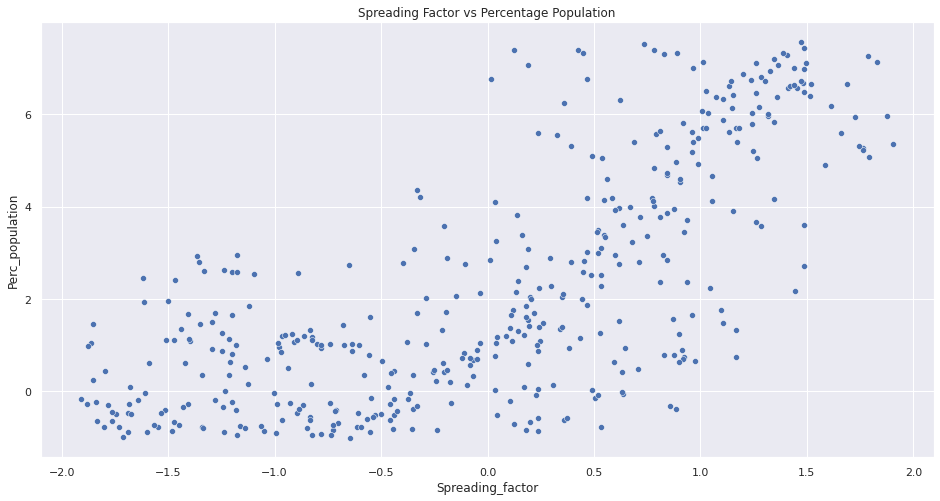

In [6]:
# your code here
plt.figure(figsize = (16,8))
sns.scatterplot(data = df_train, x = 'Spreading_factor', y = 'Perc_population')
plt.title('Spreading Factor vs Percentage Population')
plt.show()

<h4>1.2</h4> <b>Based on the graph, is there any discernable relationship between the spreading factor and percentage change in population?<b>

Ans. Yes, there seems to be a roughly exponential relationship between the 2 variables. But there is a lot of variability and any model we produce is bound to have a lot of error and variability


<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

<b> Question 2: Use k-fold cross validation along with bootstraps to find the best degree [11 points]</b><br />
<br /> <a class="anchor" id="partAQ2"></a>



**2.1** [8 pts] Use *bootstrapping* to test the robustness of your estimation of the degree chosen. As before, we use the `bacteria_train.csv` to train the model and `bacteria_test.csv` to test the model.
<br /><br />
**Instructions**<br />
- Select the max degree for computing the polynomial features and number of bootstraps.<br />
- Create bootstraps of the data. For each bootstrap perform the following:<br />
    - For each degree in the `range(1,max degree+1)` perform the following:<br />
        - Compute the polynomial features for the data.<br />
        - Perform k-fold cross validation with k=10<br />
        - Compute the polynomial features for the data.<br />
        - Compute the $MSE$ of the train and validation data and store in separate lists. <br />
    - Select the degree for which the mean of the k-fold $MSE$ is the least.<br />
    - Store the best degree in a list<br />
- Plot a graph to show the frequency of the degree voted best for each bootstrap from the list from above steps.<br />
- The degree voted best the most times can be selected as the best degree.<br />
- Retrain on the entire train set and report the $MSE$ on the test set.<br />

<br />

**Hints**
- Limit the maximum degree to 50.
- Limit the number of bootstraps to 100.
- Use sklearn `cross_validate()` to perform cross validation.

<br /><br />
**Why this maybe a good idea?**
<br />
- Avoids the dependence on the particular choice of a validation set<br />
- Allows for more analysis without data augmentation<br /><br />

**Why this maybe a bad idea?**<br />

- Computationally more intensive<br />
- The stochasticity in the choice of bootstraps may give unexpected results<br /><br />

**2.2** [1 pt] What are your observations? <br />

- Why do you see so much variance in the `best_degree` over the bootstraps?<br />
- What will you choose as your `best_degree` for the test set? <br /><br />

**2.3** [2 pt] Fitting the best model on the test data<br /><br />

**Instructions**<br />
- For the best degree computed above, compute the polynomial features for the data in the test csv file.<br />
- Train on the entire data from the train csv file and predict on the test data.<br />
- Print the MSE of the model <br />
- Make a scatter plot of `Spread factor` vs. `Precentage change in population` for the specified degree.  The figure should have plot of the test prediction from the regression and the actual values on the same figure. <br />
- Print the coefficients of the model<br /><br />

**Hint**<br />
* Sort the $x$ values before making your plots.
    
    
</div>

### Solutions

<h4>2.1</h4> <b>Use bootstrapping to test the robustness of your estimation of the degree chosen.<b>

In [7]:
# your code here
len_train = len(df_train)
bootstraps = []

for i in range(100):
  bootstraps.append(sorted(random.choices(np.arange(len_train),k = len_train)))

In [8]:
maxdeg = 50
MSE_list = []

for i in bootstraps:
  df_new = df_train.loc[i]
  mse_inner = []
  for j in range(1,maxdeg + 1):
    x = df_new[['Spreading_factor']]
    y = df_new['Perc_population']

    x_poly = PolynomialFeatures(j).fit_transform(x)

    lreg = LinearRegression()

    mse_score = cross_validate(lreg,x_poly,y,scoring = 'neg_mean_squared_error',cv = 10, return_train_score = True)

    mse_inner.append(np.mean(np.abs(mse_score['test_score'])))

  MSE_list.append(mse_inner)


In [9]:
# your code here
MSE_means = np.mean(np.array(MSE_list), axis = 0).reshape(-1,)

MSE_min = min(MSE_means)
min_degree = np.argmin(MSE_means) + 1

print(f'The polynomial degree that gives the minimum MSE is {min_degree} with MSE of {MSE_min:.4f}')

The polynomial degree that gives the minimum MSE is 4 with MSE of 2.6194


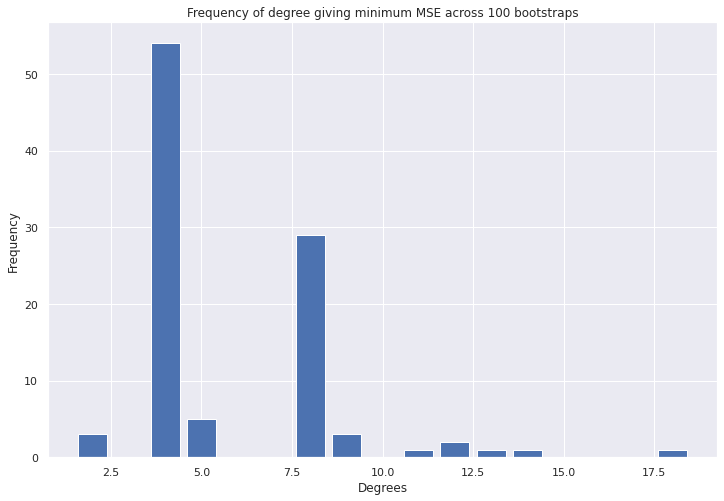

In [10]:
# your code here
degrees = {i:0 for i in range(1,51)}
for i in MSE_list:
  degrees[np.argmin(i) + 1] += 1

degrees = {k:v for k,v in degrees.items() if v != 0}

plt.figure(figsize = (12,8))
plt.bar(degrees.keys(),degrees.values())
plt.title('Frequency of degree giving minimum MSE across 100 bootstraps')
plt.xlabel('Degrees')
plt.ylabel('Frequency')
plt.show()

Retraining model with best degree

In [11]:
x_train = df_train[['Spreading_factor']]
y_train = df_train['Perc_population']

x_test = df_test[['Spreading_factor']]
y_test = df_test['Perc_population']

x_poly_train = PolynomialFeatures(min_degree).fit_transform(x_train)
x_poly_test = PolynomialFeatures(min_degree).fit_transform(x_test)

lreg = LinearRegression()
lreg.fit(x_poly_train,y_train)

y_pred_train = lreg.predict(x_poly_train)
y_pred_test = lreg.predict(x_poly_test)

MSE_test = mean_squared_error(y_pred_test,y_test)

print(f'The mean squared error on the test set is {MSE_test:.4f}')

The mean squared error on the test set is 2.5999


<h4>2.2</h4> <b>What are your observations?<b>

<b> a) Why do you see so much variance in the best_degree over the bootstraps?<b>

In [12]:
uniques_list = []
for i in bootstraps:
  uniques_list.append(len(np.unique(np.array(i))))

print(f'The average number of rows selected in each bootstrap is {np.mean(uniques_list)}')

The average number of rows selected in each bootstrap is 268.35


Ans. Out of the total 423 rows, on average only 268 rows are selected in the bootstrap. This is why there is a lot of variance in the best degree of the bootstrap

<b> b) What will you choose as your best_degree for the test set?<b>

Ans. The best degree should be 4. The degree 4 both lowest average MSE and also the least MSE in most number of bootstraps 

<h4> 2.3 </h4> <b> Fitting the best model on the test data <b>

In [13]:
# your code here
x_1 = x_test['Spreading_factor'].to_numpy()
idx = np.argsort(x_1)
x_dummy = x_1[idx]
y_dummy = y_pred_test[idx]

The coefficient of degree 0 of the polynomial is 0.0000
The coefficient of degree 1 of the polynomial is 2.1714
The coefficient of degree 2 of the polynomial is 1.5898
The coefficient of degree 3 of the polynomial is -0.1447
The coefficient of degree 4 of the polynomial is -0.3141




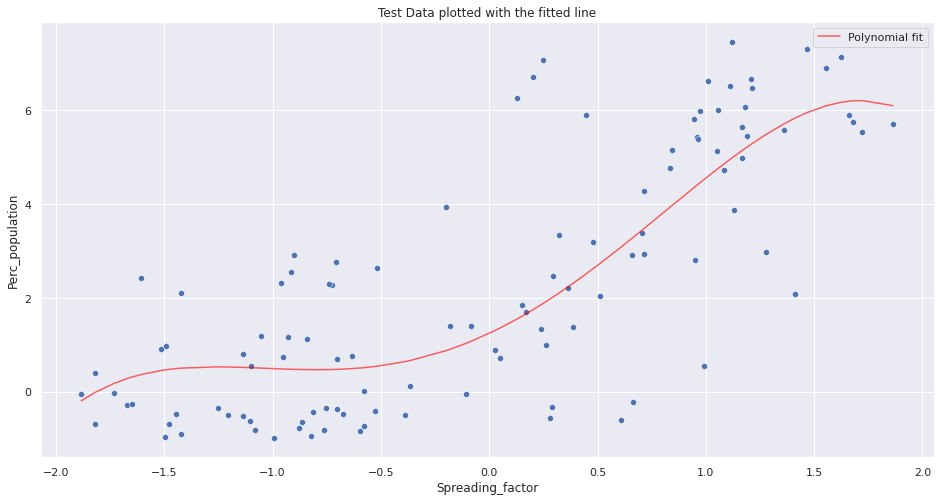

In [14]:
# your code here
coefs = lreg.coef_
for i in range(len(coefs)):
  print(f'The coefficient of degree {i} of the polynomial is {coefs[i]:.4f}')

print('\n')

plt.figure(figsize = (16,8))
sns.scatterplot(data = df_test, x = 'Spreading_factor', y = 'Perc_population')
plt.plot(x_dummy,y_dummy,label = 'Polynomial fit', color = 'red', alpha = 0.6)
plt.title('Test Data plotted with the fitted line')
plt.legend()
plt.show()

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

<b> Question 3:   Improving model consistency [26 points]</b> <a class="anchor" id="partAQ3"></a>
<br /><br />
In the previous section, we compared **30** polynomial models to find the best degree. For each model of degree n, we considered all polynomial coefficients *up to* **degree `n`** using `Polynomial_features`. However, our **best model** could have been from any possible combination of the **30** degrees chosen.
<br />
For eg. a model with degrees `1,2,4,6`
<br />
The total number of such possible models is $2^{30}\approx10^9$ and searching through all of them would be laborious and computationally inefficient. Instead, we can use $Lasso$ Regularisation which *switches off* highly unstable degree coefficients and gives us the most efficient solution.
<br /><br />

**3.1** [10 pts] Find the best hyper-parameter `alpha`.<br />

First, we will use `cross_validate` to find the the best regularisation parameter `alpha`. As before, we use the `bacteria_train.csv` for cross validation.
<br /><br />
**Note**: You are free to experiment with the values of alpha. Our suggestion is to use in powers of 10 from $10^{-3}$ to $10^{3}$
<br /><br />
**Instructions**<br />
- Select the max degree of the polynomial, and make a list of `alpha` values.<br />
- For each value of `alpha`:<br />
    - Compute the polynomial features for the data.<br />
    - Create a `Lasso` regularisation model with the value of `alpha`<br />
    - Perform k-fold cross validation with k=10 using `Lasso` as model.<br />
    - Compute the $MSE$ of the train and validation data and store in separate lists. <br />
- Select the `alpha` for which the mean of the k-fold $MSE$ is the least.<br />
- Store the previously selected values as `best alpha` & print it.<br />

<br /><br />

**Hints**<br />
- Limit the maximum degree to 30.<br />
- Take at least three different values of alpha.<br />
- Use sklearn `cross_validate()` to perform cross validation.<br /><br />

**3.2** [10 pts] Find the most significant degrees.<br />

From the previous section, you will now have the `best_alpha` hyperparameter. Now, we will use this to find the most significant degrees over a given number of bootstraps. What we mean by the above is this:<br />

For each bootstrap of the data, you will get some degrees that are **significant** $\mid\beta_i\mid \lt 0.1$. You would like to see, which degree coefficients are significant over several such iterations.<br />

As before, we use the `bacteria_train.csv` for cross validation.<br /><br />

**Note:** You are free to experiment with the number of bootstraps.<br /><br />


**Instructions**<br />
- Make a dictionary called `significant_degrees` to store count of degrees for each bootstrap.<br />
- For each bootstrap:<br />
    - Take a sample the dataframe with `frac=1`.<br />
    - Train a **Lasso** model with the `best_alpha` computed above.<br />
    - Find the most significant polynomial coefficients using $\mid\beta_i\mid \lt 0.1$.<br />
    - For each significant degree, update the count of that degree in `significant_degrees` .<br />
- Plot the count of degrees for each bootstrap as a bar plot.<br /><br />


**Hints**<br />
- Limit the maximum degree to 30.<br />
- Take at least three different values of alpha.<br />
- Use sklearn `cross_validate()` to perform cross validation.<br /><br />

**3.3** [2 pts] Compute the MSE on the test set<br />

Now, from the previous plot, you can see that only degrees upto 6 are consistently significant over several bootstraps. You will now retrain the *L1* regularised model on the entire data and find the test $MSE$<br /><br />

**Instructions**<br />

- Retrain the *regularised* model with *most frequent degree (most significant highest degree)* on the entire test set and report the $MSE$ on the test set.<br />
- Find the degrees of the polynomial that have cofficients with absolute value greater than 0.1<br />
- Compare the test $MSE$ computed in section 3, to the previous section and report your observations.<br />
- Plot a graph indicating your true and predicted data.<br />

**3.4** [4 pts] What are your Observations?<br />

- Is the `best_degree` computed above more consistent over the bootstraps? Why?<br />
- Which degree coefficients in your best fit model from above are significant? Why only some?<br />
- Is your test $MSE$ with regularisation comparable to the findings from previous section. If more, or less, by how much?<br />
- Is your current model more reliable? On what basis do you claim its robustness?<br />
    
    
</div>

### Solutions

<h4>3.1</h4>
<b>Find the best hyper-parameter alpha.<b>

We have used degrees from 1 to 25 and alpha values from 0.0001 to 100, to find the best alpha.

In [15]:
alpha_list = [0.0001,0.001,0.01,0.1,1,10,100] #use this

In [16]:
max_degree = 25 # we have found the best degree is 4 from above

In [17]:
mse_train_list = []
mse_val_list   = []


In [18]:
alpha_used = []
degree_used = []

In [19]:
x_train = df_train[['Spreading_factor']]
y_train = df_train['Perc_population']

In [20]:
warnings.filterwarnings("ignore")

for degree in range(1,max_degree+1):
  for alpha in alpha_list:
    x_poly_train = PolynomialFeatures(degree=degree).fit_transform(x_train)
    lasso_lr = Lasso(alpha= alpha)   # try with normalize = True, tried no much diff, bcoz only 1 feature
    cv_results = cross_validate(lasso_lr,x_poly_train,y_train,scoring = 'neg_mean_squared_error', cv=10,return_train_score = True)
    mse_train_list.append(cv_results['train_score'].mean())
    mse_val_list.append(cv_results['test_score'].mean())
    alpha_used.append(alpha)
    degree_used.append(degree)

    

In [21]:
mse_val_list = np.abs(mse_val_list)

In [22]:
min_mse = min(mse_val_list)
min_mse

2.5913703494335687

In [23]:
best_mse_index = list(mse_val_list).index(min_mse)
best_mse_index

79

In [24]:
best_alpha_value = alpha_used[best_mse_index]
best_degree =  degree_used[best_mse_index]

In [25]:
print(f'The best alpha value is {best_alpha_value}. The mininum mse we have got is {min_mse:.4f}')

The best alpha value is 0.01. The mininum mse we have got is 2.5914


<h4> 3.2 </h4> <b> Find the most significant degrees. <b>

In [26]:
significant_degrees={}

In [27]:
no_of_bootstraps = 40

**Finding the significant coeff using a range of degrees and multiple bootstraps**

In [28]:
degrees = 30
significant_degrees={}
for degree in range(1,degrees+1):

  for i in range(no_of_bootstraps):

    df_sample = df_train.sample(frac=1, random_state= degree) # random_state = degree

    x_train = df_sample[['Spreading_factor']]
    y_train = df_sample['Perc_population']
    x_poly_train = PolynomialFeatures(degree=degree).fit_transform(x_train) # we have found from Q-2 that 4 is the best degree
    lasso_lr = Lasso(alpha=best_alpha_value) # we found the best alpha value from above
    cv=10
    cv_results = cross_validate(lasso_lr,x_poly_train,y_train, scoring='neg_mean_squared_error',cv=cv,return_estimator=True)

    for i in range(cv): # we have 10(cv) models with coefficients
    
     est_coefs_list = cv_results['estimator'][i].coef_ # finding the coefs for each of the estimator


    for name,value_of_coef in enumerate(est_coefs_list) : 
      
        beta = 'beta_' +str(name) # denoting name for each of the coef, ex beta_0

        if beta not in significant_degrees.keys():
          significant_degrees[beta]= 0

        if np.abs(value_of_coef) >0.1 : # condition given, couting the number of times 'the value of coef' is significant
          significant_degrees[beta]= significant_degrees[beta]+1


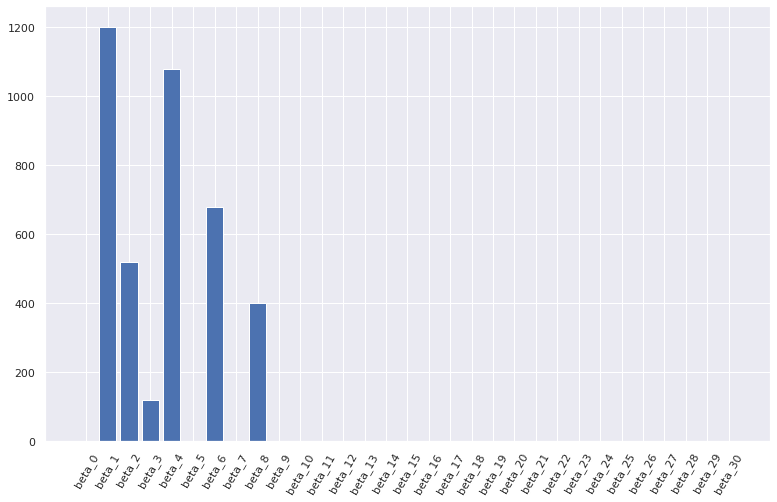

In [29]:
plt.figure(figsize=(13,8))
plt.bar(significant_degrees.keys(), significant_degrees.values());
plt.xticks(rotation=60);

<h4> 3.3  </h4> <b> Compute the MSE on the test set <b>

Do the train set

The most significant highest degree is 6 

In [30]:
x_test = df_test[['Spreading_factor']]
y_test = df_test['Perc_population']
x_poly_test = PolynomialFeatures(degree=6).fit_transform(x_test)

In [31]:
x_train = df_train[['Spreading_factor']]
y_train = df_train['Perc_population']
x_poly_train = PolynomialFeatures(degree=6).fit_transform(x_train) # we have found from Q-2 that 4 is the best degree
lasso_lr = Lasso(alpha=best_alpha_value)
lasso_lr.fit(x_poly_train,y_train)
y_pred = lasso_lr.predict(x_poly_test)
mse = MSE(y_test,y_pred)
print(f'MSE on the test set by training on the train set with highest degree and best alpha is : {mse :.4f}')

MSE on the test set by training on the train set with highest degree and best alpha is : 2.5973


In [32]:
lasso_lr.coef_

array([ 0.        ,  2.04634796,  0.85273648,  0.        ,  0.2852452 ,
       -0.03509923, -0.12120783])

In [33]:
sig_coefs = []

for indx,value in enumerate(lasso_lr.coef_):
  beta =''
  beta = 'beta'+str(indx)
  if np.abs(value) > .1:
    sig_coefs.append(beta)

print(f'The Degrees of the polynomial that have cofficients with absolute value greater than 0.1 are {sig_coefs} ')

The Degrees of the polynomial that have cofficients with absolute value greater than 0.1 are ['beta1', 'beta2', 'beta4', 'beta6'] 


Compare the test MSE computed in section 3, to the previous section and report your observations.

The MSE from both the sections are close to the value 2.59

In [ ]:
# plt.figure(figsize = (16,8))
# sns.scatterplot(data = df_test, x = 'Spreading_factor', y = 'Perc_population')
# plt.plot(x_dummy,y_dummy,label = 'Polynomial fit', color = 'red', alpha = 0.6)
# plt.title('Test Data plotted with the fitted line')
# plt.legend()
# plt.show()

In [34]:
# your code here
x_1 = x_test['Spreading_factor'].to_numpy()
idx = np.argsort(x_1)
x_dummy = x_1[idx]
y_dummy = y_pred[idx]

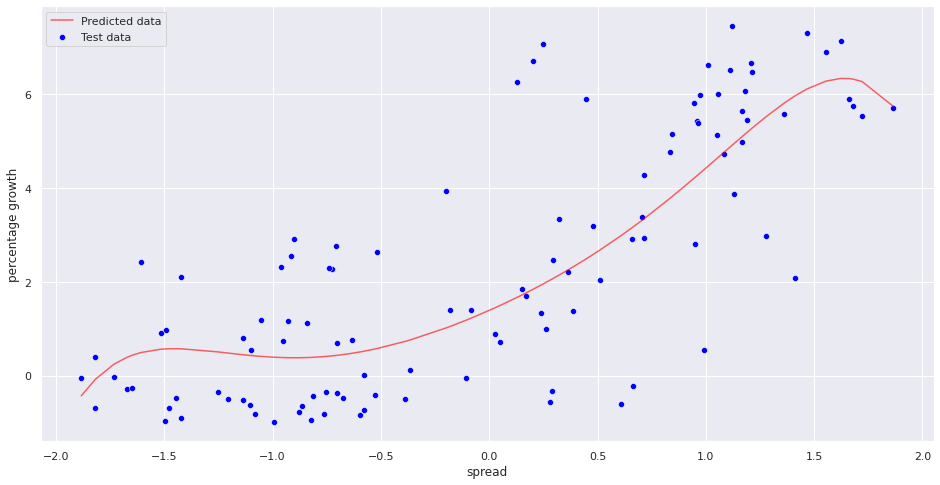

In [35]:
plt.figure(figsize =(16,8))
sns.scatterplot(data= df_test, x= 'Spreading_factor',y= 'Perc_population', color='blue',label='Test data')
plt.plot(x_dummy,y_dummy, color='red', label = 'Predicted data',alpha=0.6)  
plt.xlabel('spread')
plt.legend()
plt.ylabel('percentage growth');

<h4> 3.4 </h4> <b> What are your observations? <b>

<b> a) Is the best_degree computed above more consistent over the bootstraps? Why? <b>

Ans. The best degree above is more consistent over a lower band of betas. In the earlier non regularized version, we saw that there were a lot of degrees with low number of best degrees, and some very high degrees coming as best degrees.
On the other hand, under Lasso the best degrees are more consistent, and also confined to the lower degrees unlike the unregularized counterpart

<b> b) Which degree coefficients in your best fit model from above are significant? Why only some? <b>

Ans. The best degrees are 

```
['beta1', 'beta2', 'beta4', 'beta6'] 
```
The possible reasons for mostly even coefficients is that the data kind of looks like the exponentials are tapering off at Spreading Factor ~2. Might also decrease. Even exponents model this kind of cyclic nature better.

Consider for example y = x^2 vs y = x^3. x^2 is symmetric around the y-axis. First decreases, then increases. While x^3 is a continuously increasing function.



<b> c) Is your test  𝑀𝑆𝐸  with regularisation comparable to the findings from previous section. If more, or less, by how much? <b>

Ans. They both are roughly the same. The unregularized model gives a MSE of 2.62 while Lasso gives 2.59.
The difference is in the fact that Lasso is more interpretable.

<b> d) Is your current model more reliable? On what basis do you claim its robustness? <b>

Ans. Our current model is more robust because it removes the unwanted exponents. It is very likely that it will model data outside the x-axis range currently given better because it meshes will with a prior theory of even exponents causing tapering off or cycling of the curve at around x = 2

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">
<h2 style="color:black;background-color:#EFF8D0"> Part B: Racial bias in machine learning systems</h2> <a class="anchor" id="partB"></a>

### [60 points] 
    
![](https://static.propublica.org/projects/algorithmic-bias/assets/img/generated/opener-b-crop-2400*1350-00796e.jpg)

<br />
<b> Dataset Description </b><br />
    
The main dataset is the `compas.csv` <br />
ProPublica's analysis is publically available [here](https://github.com/propublica/compas-analysis).

The dataset was made publically available by **Northpointe**, an American tech-company that works with law establishment across several states in the US to predict future crimes based on past records of criminals.

It has been suspected that the software used by Northpointe, `COMPAS`, is biased against the african american criminals, who end up with `high-risk` tags, despite minor criminal record, whereas `Caucasians` regularly received low-scores despite more significant criminal charges.
    
After pressure from several news agencies and a public investigation by ProPublica, the company released this dataset with a slice of the factors usually considered in order to assign a score to criminals.
<br /><br />
The dataset also contains a column `two_year_recid` with a binary response, i.e `1` if the released criminal ended up committing another crime within two years and `0` if the criminal did not commit a crime within a period of two years.
    
To learn more about this dataset, and the public investigation, you are highly recommended to read ProPublica's article on [Machine Bias](https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing)

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">
    
**Question 1: Setting up the problem and understanding the data [15 points]** <a class="anchor" id="partBQ1"></a>

**1.1** [1pt] Split the data into 80% training and 20% validation sets stratified by race.

By Stratified we mean that the two sets should have roughly similar distribution of races as the original data. For more information on how to stratify using sklearn, check sklearn documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).<br />

**Note:** Before splitting you may want to process the categorical predictors first so you don't have to do it separately in train and validation later. 
<br /><br />
**1.2** [4pts] Can you guess why processing the categorical predictors is important? What is the risk of processing categorical predictors after splitting into train and validation sets?
<br /><br />

**1.3** [8pts] Make overlapping distributions (histograms) of the following predictors for two groups, African American & Caucasian.
- Age
- Priors count
- Sex
- Length of stay
<br /><br />

**1.4** [2pts] Among the following variables, which ones show disparity between the two groups? Explain your results in 2-3 sentences.
<br /><br />

<h4>1.1</h4>
<b>
Split the data into 80% training and 20% validation sets stratified by race.

By Stratified we mean that the two sets should have roughly similar distribution of races as the original data. For more information on how to stratify using sklearn, check sklearn documentation here.
<br />
</b>    
**Note:** Before splitting you may want to process the categorical predictors first so you don't have to do it separately in train and validation later.

In [36]:
# your code here
# df_compass = pd.read_csv('/content/drive/MyDrive/AI_1/hw2/compas.csv')
# df_compass = pd.read_csv(path + '/data/compas.csv')
df_compass = pd.read_csv('/content/drive/MyDrive/Colab files/AI - 1/HW - 2/compas.csv')

In [37]:
df_compass.head()

,age,c_charge_degree,c_charge_desc,race,score_text,sex,priors_count,juv_fel_count,juv_misd_count,juv_other_count,decile_score,two_year_recid,length_of_stay,priors_1,priors_234,priors_5plus,juv_fel_1plus,juv_misd_1plus,juv_other_1plus,charge_any_drug,charge_any_violence_aggression,charge_any_theft,length_of_stay_thresh
0,50,M,arrest case no charge,Caucasian,Medium,0,30,0,0,0,6,1,4,0,0,1,0,0,0,0,0,0,4
1,28,M,Susp Drivers Lic 1st Offense,African-American,Medium,1,0,0,0,0,7,1,0,0,0,0,0,0,0,0,0,0,0
2,24,F,Aggravated Assault W/dead Weap,Other,Low,1,1,0,0,0,4,1,5,1,0,0,0,0,0,0,1,0,5
3,25,F,Burglary Unoccupied Dwelling,Hispanic,Medium,0,14,0,1,2,6,0,1,0,0,1,0,1,1,0,0,1,1
4,34,F,Possession of Cannabis,African-American,Medium,1,7,0,0,0,6,1,0,0,0,1,0,0,0,1,0,0,0


In [38]:
# your code here
df_compass = df_compass.drop(['c_charge_degree','c_charge_desc','score_text'],axis=1)

In [39]:
race_x = df_compass['race'].values # getting race as an array to perform one-hot
race_list = df_compass['race'].unique() # unique categories

one_enc = OneHotEncoder(categories=[race_list]) # passing in race_list to one-hot object
race_x_transformed = one_enc.fit_transform(race_x.reshape(-1,1)).toarray() # transforming and then converting into array.
race_x_transformed = race_x_transformed.astype(int)

df_race = pd.DataFrame(data= race_x_transformed, columns=race_list)  

df_compass_processed = pd.concat([df_compass,df_race], axis=1)
df_compass_processed.drop(['race'],axis=1,inplace=True)
df_compass_processed.head()

,age,sex,priors_count,juv_fel_count,juv_misd_count,juv_other_count,decile_score,two_year_recid,length_of_stay,priors_1,priors_234,priors_5plus,juv_fel_1plus,juv_misd_1plus,juv_other_1plus,charge_any_drug,charge_any_violence_aggression,charge_any_theft,length_of_stay_thresh,Caucasian,African-American,Other,Hispanic,Native American,Asian
0,50,0,30,0,0,0,6,1,4,0,0,1,0,0,0,0,0,0,4,1,0,0,0,0,0
1,28,1,0,0,0,0,7,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,24,1,1,0,0,0,4,1,5,1,0,0,0,0,0,0,1,0,5,0,0,1,0,0,0
3,25,0,14,0,1,2,6,0,1,0,0,1,0,1,1,0,0,1,1,0,0,0,1,0,0
4,34,1,7,0,0,0,6,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0


In [40]:
train, test = train_test_split(df_compass_processed.values,stratify=df_compass['race'].values, random_state=7) # we are passing
# df_compass['race] as the startify parameter, this will gives x_train and x_test with the same distribution as of df_compass[race]

In [41]:
train = pd.DataFrame(data= train, columns= df_compass_processed.columns)

In [42]:
test = pd.DataFrame(data= test, columns= df_compass_processed.columns)


**Checking that the stratification has worked**

In [43]:
train['African-American'].sum() # after startify

2142

In [44]:
train['Caucasian'].sum() # after startify

1419

In [45]:
2142/1419 # ratio of (african/caucasian) from x_train 

1.5095137420718816

In [46]:
df_compass.groupby(['race']).count()['age'] # race distribution of the original dataset

race
African-American    2857
Asian                 28
Caucasian           1892
Hispanic             458
Native American       10
Other                309
Name: age, dtype: int64

In [47]:
2857/1892 # ratio of (african/caucasian) from the original dataset

1.5100422832980973

<h4>1.2</h4>
<b>Can you guess why processing the categorical predictors is important? What is the risk of processing categorical predictors after splitting into train and validation sets?

Ans. Processing categorical predictors helps improve the model. In order for us to use categorical predictors in our model we need it into convert into numerical variables. 

In cases where we dont use startification, we might end up with a dataset which do not have a particular category.

<h4>1.3 </h4>
<b>
Make overlapping distributions (histograms) of the following predictors for two groups, African American & Caucasian.
- Age
- Priors count
- Sex
- Length of stay


In [48]:
# your code here
df_CC = train[train['Caucasian'] == 1]
df_AA = train[train['African-American'] == 1]

print(f'Caucasian training set has {df_CC.shape[0]} values')
print(f'African-American training set has {df_AA.shape[0]} values')

Caucasian training set has 1419 values
African-American training set has 2142 values


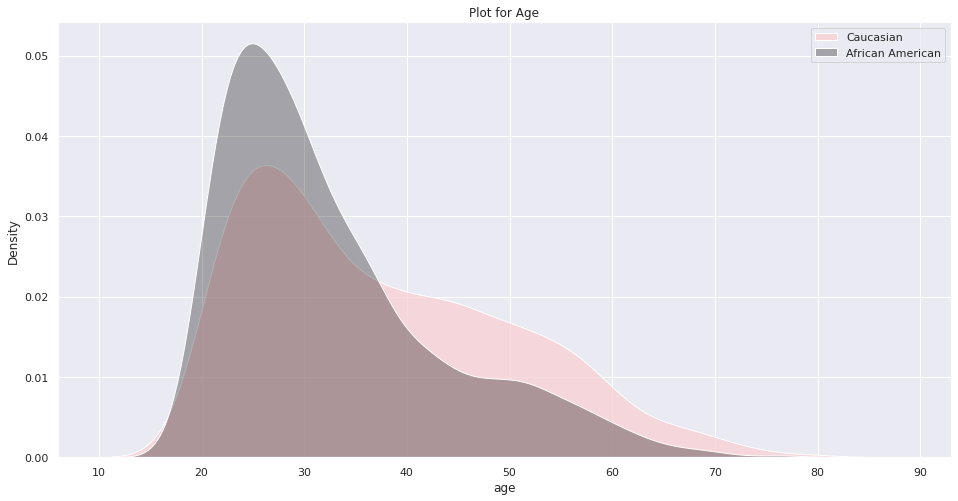

In [49]:
plt.figure(figsize = (16,8))
sns.kdeplot(data=df_CC, x="age",multiple = 'stack',alpha = 0.8, color = '#F9D2D5',label = 'Caucasian')
sns.kdeplot(data=df_AA, x="age",multiple = 'stack',alpha = 0.3, color = 'black',label = 'African American')
plt.title('Plot for Age')
plt.legend()
plt.show()

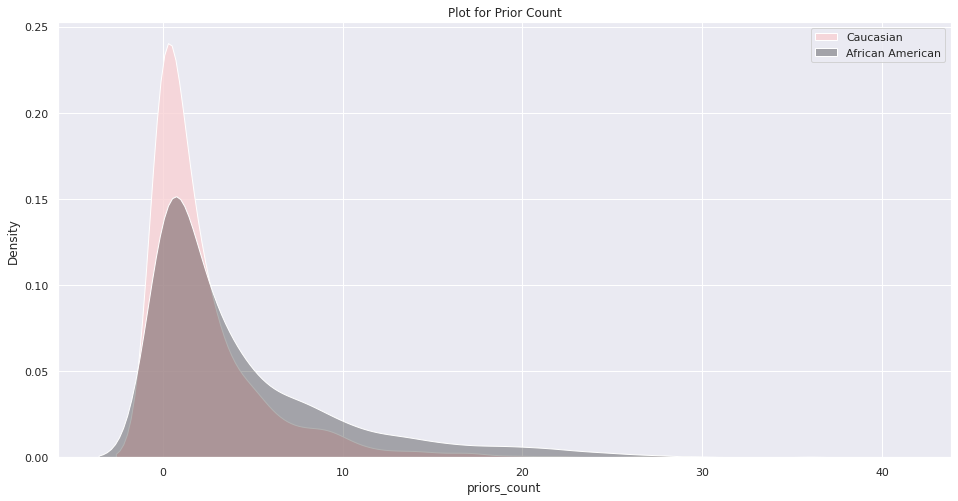

In [50]:
plt.figure(figsize = (16,8))
sns.kdeplot(data=df_CC, x="priors_count",multiple = 'stack',alpha = 0.8, color = '#F9D2D5',label = 'Caucasian')
sns.kdeplot(data=df_AA, x="priors_count",multiple = 'stack',alpha = 0.3, color = 'black',label = 'African American')
plt.title('Plot for Prior Count')
plt.legend()
plt.show()

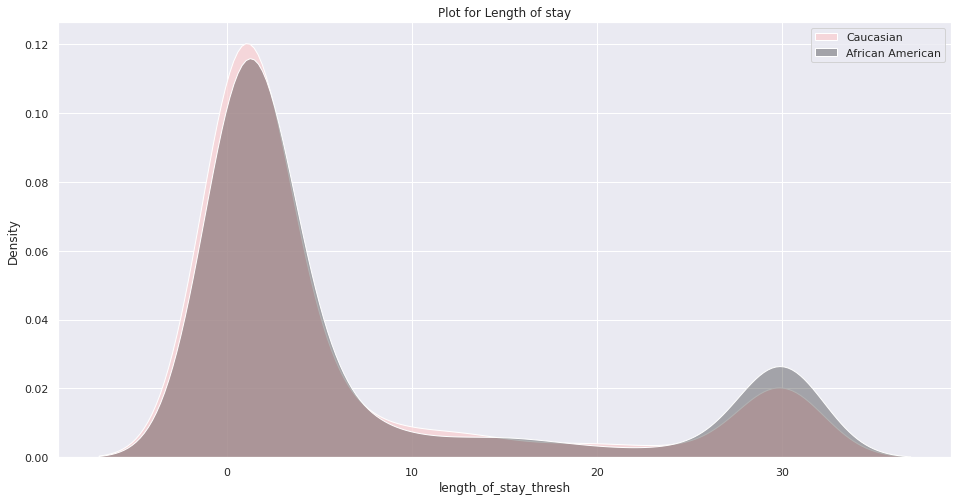

In [51]:
plt.figure(figsize = (16,8))
sns.kdeplot(data=df_CC, x="length_of_stay_thresh",multiple = 'stack',alpha = 0.8, color = '#F9D2D5',label = 'Caucasian')
sns.kdeplot(data=df_AA, x="length_of_stay_thresh",multiple = 'stack',alpha = 0.3, color = 'black',label = 'African American')
plt.title('Plot for Length of stay')
plt.legend()
plt.show()

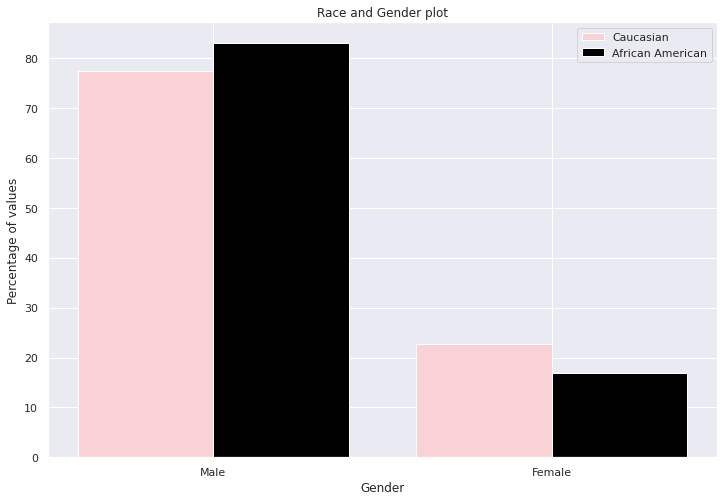

In [52]:
plt.figure(figsize=(12,8))
plt.bar(np.arange(2) - 0.2, df_CC['sex'].value_counts()/df_CC['sex'].value_counts().sum()*100, color = '#F9D2D5',width = 0.4)
plt.bar(np.arange(2) + 0.2, df_AA['sex'].value_counts()/df_AA['sex'].value_counts().sum()*100, color = 'Black',width = 0.4)
plt.xticks(np.arange(2), ['Male','Female'])
plt.title('Race and Gender plot')
plt.xlabel('Gender')
plt.ylabel('Percentage of values')
plt.legend(['Caucasian','African American'])
plt.show()

<h4>1.4</h4>
<b> 
Among the following variables, which ones show disparity between the two groups? Explain your results in 2-3 sentences.

Ans. We see significant differences in Age and Prior Count of offendors.


*   African Americans tend to much younger compared to Caucasians.
*   African Americans also tend to have much higher prior counts compared to Caucasians

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">
   
**Question 2: Baseline model fitting [19 points]** <a class="anchor" id="partBQ2"></a>

**2.1** [15pts] Build a logistic regression model to predict recidivism (`two_year_recid`) on these data and be sure to include race as a predictor.<br />
**Note**: In your list of predictors, `race` is one of the predictors.

Report the following on the **validation set**:
1. Overall model accuracy as a percentage
2. *False Positive Rate(FPR)* as a percentage for:
    - `African Americans`
    - `Cacausians`
3. *False Negative Rate(FNR)* as a percentage for:
    - `African Americans`
    - `Caucasians`
4. Ratio of the FPR between `African_Americans` and `Caucasians`
5. Ratio of the FNR between `African_Americans` and `Caucasians`

i.e $\frac{FPR(AA)}{FPR(CC)}$ and $\frac{FNR(AA)}{FNR(CC)}$

<br  /><br />
**2.2** [4pts] What do you observe? Is there any disparity in the $FPR$ and $FNR$ for the two groups?
Explain your findings in 3-6 sentences.


<h4>2.1</h4>
<b> 
Build a logistic regression model to predict recidivism (two_year_recid) on these data and be sure to include race as a predictor.

In [53]:
def training(x_train,y_train,x_test,y_test):
  logreg = LogisticRegression(random_state=42)
  logreg.fit(x_train,y_train)

  y_pred = logreg.predict(x_test)
  y_probs = logreg.predict_proba(x_test)[:,1]

  dummy_frame = pd.DataFrame(y_pred, columns = ['Predicted_Recidivism'])

  concat_df = x_test.join(y_test).join(dummy_frame)

  return concat_df, y_probs

def conf_matrix(matrix):
  TN = matrix[0,0]
  FP = matrix[0,1]
  FN = matrix[1,0]
  TP = matrix[1,1]

  FPR = FP / (FP + TN)
  FNR = FN / (TP + FN)

  return round(FPR*100), round(FNR*100)

def metrics(concat_df):
  accuracy = accuracy_score(concat_df['two_year_recid'],concat_df['Predicted_Recidivism'])
  
  concat_CC = concat_df[concat_df['Caucasian'] == 1]
  concat_AA = concat_df[concat_df['African-American'] == 1]

  matrix_CC = confusion_matrix(concat_CC['two_year_recid'],concat_CC['Predicted_Recidivism'])
  matrix_AA = confusion_matrix(concat_AA['two_year_recid'],concat_AA['Predicted_Recidivism'])


  FPR_CC, FNR_CC = conf_matrix(matrix_CC)
  FPR_AA, FNR_AA = conf_matrix(matrix_AA)

  ratio_FPR = round(FPR_AA / FPR_CC, 4)
  ratio_FNR = round(FNR_AA / FNR_CC, 4)

  print(f'The overall accuracy is {accuracy*100:.0f}%')
  print(f'The false positive rate for African Americans is {FPR_AA}%')
  print(f'The false positive rate for Caucasians is {FPR_CC}%')
  print(f'The false negative rate for African Americans is {FNR_AA}%')
  print(f'The false negative rate for Caucasians is {FNR_CC}%')
  print(f'The ratio of false positive rates is {ratio_FPR}')
  print(f'The ratio of false negative rates is {ratio_FNR}')


In [54]:
# your code here
warnings.filterwarnings("ignore")

new_train = train.copy()
new_test = test.copy()

x_train = new_train.drop('two_year_recid',axis = 1)
y_train = new_train['two_year_recid']

x_test = new_test.drop('two_year_recid',axis = 1)
y_test = new_test['two_year_recid']

predicted_df, y_probs = training(x_train,y_train,x_test,y_test)

metrics(predicted_df)


The overall accuracy is 69%
The false positive rate for African Americans is 31%
The false positive rate for Caucasians is 22%
The false negative rate for African Americans is 29%
The false negative rate for Caucasians is 54%
The ratio of false positive rates is 1.4091
The ratio of false negative rates is 0.537


<h4>2.2</h4>
<b>
What do you observe? Is there any disparity in the $FPR$ and $FNR$ for the two groups?
Explain your findings in 3-6 sentences.

Ans. Quick go through of definitions before:
* FPR - False Positive Rate. Actually false, but predicted true. In this case, it would mean **_Did not actually commit a crime again, but model predicted that the person would_**
* FNR - False Negative Rate. Actually true, but predicted false. In this case, it would mean **_Actually committed a crime again, but model predicted that the person would not_**

With that through, we can see that:
* FPR(AA) > FPR(CC) i.e., the model is wrongly predicting that more African-Americans would commit crimes again than for Caucasians. In this case, it is a bad model and is biased against African-Americans.
*   FNR(AA) < FNR(CC) i.e., the model is wrongly predicting that lesser Caucasians would commit crimes again than for African Americans. In this case too, the model is performing badly in the case of Caucasians.


We can clearly see that something in the model is biasing it against African Americans.

Some possibilities are:
* The race column is biasing the model (We investigate this in the next subsection)
* **Some demographic trends are biasing the model. As we will see in Part C, I control for 2 of the demographic trends that we saw in the EDA section above, but as we will see just below, the model is still biased in the same way to the same degree against African Americans.**

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">
    
**Question 3: 'Race'less model fitting [16 points]** <a class="anchor" id="partBQ3"></a>
 
**3.1** [10pts] Refit the logistic model in 2.1 but this time **without** `race` as a predictor. 
Again, Report the following on the **validation set**:
1. Overall model accuracy as a percentage
2. **False Positive Rate(FPR)** as a percentage for:
    - African Americans
    - Caucasians
2. **False Negative Rate(FNR)** as a percentage for:
    - African Americans
    - Caucasians
3. 
    - Ratio of the FPR between `African_Americans` and `Caucasians`
    - Ratio of the FNR between `African_Americans` and `Caucasians`

i.e $\frac{FPR(AA)}{FPR(CC)}$ and $\frac{FNR(AA)}{FNR(CC)}$


<br /><br />

**3.2** [2pts] Now, without the `race` as a predictor, what do you observe? 
<br /><br />
**3.3** [2pts] How do these compare to the model when the race **is** included as a predictor?
<br /><br />
**3.4** [2pts] Given your exploration and modeling of the data, should a predictive tool be trusted to be unbiased even if it doesn’t explicitly use a variable such as race to predict future crime?  Why or why not?  Why is the bias still occurring or not occurring?  Explain in 3-6 sentences total.


<h4>3.1</h4>
<b>
Refit the logistic model in 2.1 but this time without race as a predictor. 

In [55]:
# your code here
# your code here
warnings.filterwarnings("ignore")

race_cols = ['Caucasian',	'African-American',	'Other',	'Hispanic',	'Native American', 'Asian']
new_train = train.drop(race_cols, axis = 1)
new_test = test.drop(race_cols, axis = 1)

x_train = new_train.drop('two_year_recid',axis = 1)
y_train = new_train['two_year_recid']

x_test = new_test.drop('two_year_recid',axis = 1)
y_test = new_test['two_year_recid']

predicted_df, y_probs = training(x_train,y_train,x_test,y_test)

metrics(predicted_df.join(test[race_cols]))

The overall accuracy is 69%
The false positive rate for African Americans is 31%
The false positive rate for Caucasians is 20%
The false negative rate for African Americans is 28%
The false negative rate for Caucasians is 56%
The ratio of false positive rates is 1.55
The ratio of false negative rates is 0.5


<h4> 3.2 </h4>
<b>
Now, without the race as a predictor, what do you observe?

Ans. We see very similar results as we saw in the model with race as a predictor. It is possible for ML models to [learn about race even though it is not explicitly given](https://twitter.com/drlukeor/status/1422199954668363776) through other differences.

<h4>3.3</h4>
<b>How do these compare to the model when the race is included as a predictor?

Ans. The results are remarkably similar. The model seems to be learning about race of the person through some other means. It can often be hard to pinpoint where exactly this happens.

As we will see in Part C, I have tried to control for some demographic variables we looked at in the EDA. Some of the controls seem to work, while others don't

<h4>3.4</h4>
<b>Given your exploration and modeling of the data, should a predictive tool be trusted to be unbiased even if it doesn’t explicitly use a variable such as race to predict future crime?  Why or why not?  Why is the bias still occurring or not occurring?  Explain in 3-6 sentences total.


Ans. My personal opinion is that predictive models should not be used at all (See Covid prediction models) for making decisions about things we don't understand and don't have any skin in the game in. Predictive models can be used by companies for internal forecasts or market projections, because they have skin in the game. If the model fails, either company fails or it stops relying on the models.

But in the domain of social sciences, predictive models should not be used at all because we don't understand the underlying processes that give rise to the result we see. Predictive models should not be used explicitly in cases where it performs badly like in this case

Bias occurs because a lot of the variables we use are often one way or other correlated with each other in the social domain. Social phenomena are often complex emergent phenomena and it is hard to pinpoint where the bias is picked up from. In some cases the bias might be good, in most cases not (See twitter thread linked above)

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">
    
**Question 4: Receiver Operating Characteristic curve [10 points]** <a class="anchor" id="partBQ4"></a>

**4.1** [5pts] Use logistic regression from above and plot the *Receiver Operating Characteristic curve* for two races, `African Americans` & `Caucasians`. 
<br /><br />
**4.2** [5pts] You will notice that changing the thresholds can *reduce* bias between the two classes, but it can also affect model accuracy. We want our model to be **accurate** but also **unbiased**. So what shall we do?

- Remove bias?
- Lose model accuracy?

Write down your strategy to overcome this difficulty. Please keep your answers short (300 word limit)


<h4>4.1</h4>
<b>
Use logistic regression from above and plot the Receiver Operating Characteristic curve for two races, African Americans & Caucasians.

In [56]:
def plot_roc(prob_df):
  plt.figure(figsize = (12,8))

  df_CC = prob_df[prob_df['Caucasian'] == 1]
  df_AA = prob_df[prob_df['African-American'] == 1]

  CC_test = df_CC['two_year_recid']
  CC_probs = df_CC['y_probs']

  AA_test = df_AA['two_year_recid']
  AA_probs = df_AA['y_probs']

  fpr_cc, tpr_cc, thresholds_cc = roc_curve(CC_test,CC_probs)
  fpr_aa, tpr_aa, thresholds_aa = roc_curve(AA_test,AA_probs)

  CC_auc = roc_auc_score(CC_test,CC_probs)
  AA_auc = roc_auc_score(AA_test,AA_probs)

  plt.plot(fpr_cc, tpr_cc, label=f'Caucasian (area = {CC_auc:.2f})', color = 'red')
  plt.plot(fpr_aa, tpr_aa, label=f'African-American (area = {AA_auc:.2f})', color = 'black')
  plt.plot([0, 1], [0, 1],'b--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC curve')
  plt.legend(loc="lower right")

Let us rerun the Logistic Regression with race as a predictor here

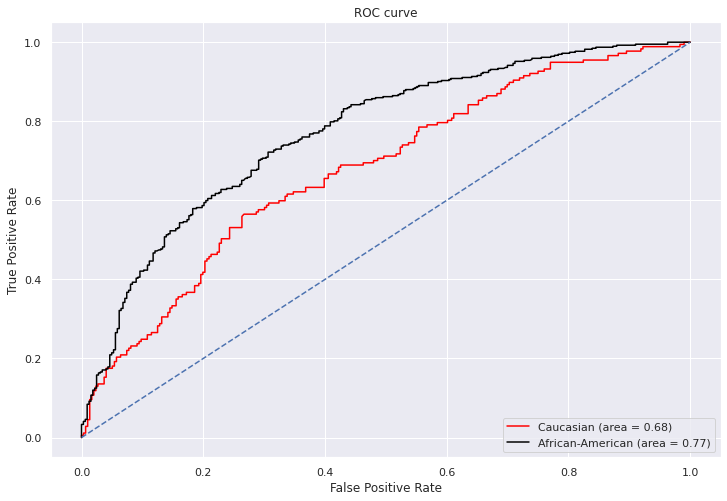

In [57]:
# your code here
# your code here
warnings.filterwarnings("ignore")

new_train = train.copy()
new_test = test.copy()

x_train = new_train.drop('two_year_recid',axis = 1)
y_train = new_train['two_year_recid']

x_test = new_test.drop('two_year_recid',axis = 1)
y_test = new_test['two_year_recid']

predicted_df, y_probs = training(x_train,y_train,x_test,y_test)
predicted_df['y_probs'] = y_probs
plot_roc(predicted_df)


Let us do ROC curve with raceless predictor now

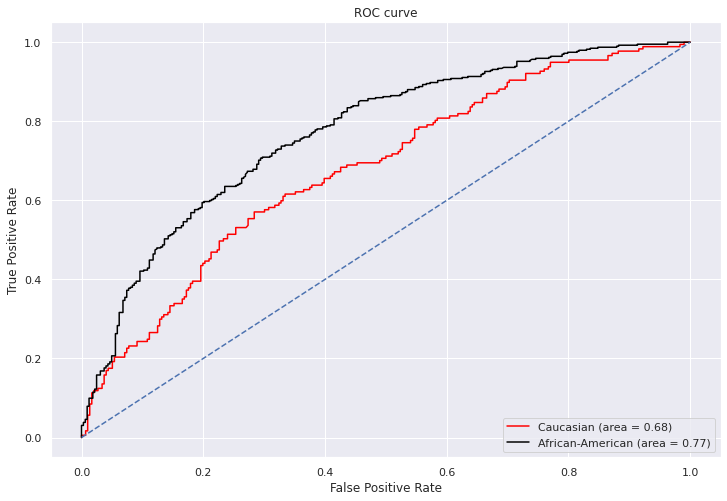

In [58]:
# your code here
warnings.filterwarnings("ignore")

race_cols = ['Caucasian',	'African-American',	'Other',	'Hispanic',	'Native American', 'Asian']
new_train = train.drop(race_cols, axis = 1)
new_test = test.drop(race_cols, axis = 1)

x_train = new_train.drop('two_year_recid',axis = 1)
y_train = new_train['two_year_recid']

x_test = new_test.drop('two_year_recid',axis = 1)
y_test = new_test['two_year_recid']

predicted_df, y_probs = training(x_train,y_train,x_test,y_test)
predicted_df['y_probs'] = y_probs

plot_roc(predicted_df.join(test[race_cols]))


<h4>4.2</h4>
<b>
How to ensure the model is accurate and unbiased? Please keep your answers short (300 word limit)

Ans. We can ensure accuracy of model, especially in the case of regression by removing the columns that are correlated with each other.

In this case, the problem is that a lot of demographic variables might be and often are correlated with race. For eg., the median age of AAs in the US is much lesser than for CCs. Given that criminals are more often than not young men in their 20s, AAs would tend to have more criminals per capita all else equal.

In social sciences, pinpointing these relationships are often very hard, so we might often overshoot and remove more variables than needed and lose accuracy, or include all those variables and have bias without the ability to pinpoint where this bias comes from.

But the best way to improve accuracy **and** remove bias is to remove variables in the model that are well correlated with variables which might include bias. We could use more complex models, but that removes interpretability.

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">
<h2 style="color:black;background-color:#EFF8D0"> Part C: Come up with a better model [Optional Extra 5 Points*] </h2>  <a class="anchor" id="PartC"></a>
    
Improve the models you have previously coded by including:
 - Polynomial terms
 - Interaction terms
 - Regularization parameters
 - Different upsampling techniques
 - KNN classification

with a goal to maximize the new metric which includes both the bias and the accuracy, we define `Bias_Corrected_Accuracy(BCA)` as:
    

$$BCA = Acccuracy - {\left|FPR(AA) - FPR(CC)\right|}$$
    
 
Please report your maximum `BCA` on the forums and add the computation code to your homework for bonus points.

**Note:** The ideas given above are not exhaustive. You are free to try other betters to come up with a better model.

*This is an optional section for 5 points. If you lose 5 points in Part A and Part B, you can make it up in this section. The maximum score still remains 100.

# Trying to improve the model by controlling for variables

## Controlling for variables in model with race

As we spoke about in Q2.2, here I try to control for 2 variables we looked at in the EDA section, age and priors which had different distributions for AA and CC.

And as we will see below, this doesn't really improve our model. But this is because the model is possibly learning about race from other variables that are correlated with race

These are metrics with controls for age. We are selecting only people aged under 30 to see if the difference in age distributions of the races is what is causing the disparity in the FPR and FNR metrics

In [59]:
# your code here
warnings.filterwarnings("ignore")

new_train = train[train['age'] <= 30].reset_index()
new_test = test[test['age'] <= 30].reset_index()

x_train = new_train.drop('two_year_recid',axis = 1)
y_train = new_train['two_year_recid']

x_test = new_test.drop('two_year_recid',axis = 1)
y_test = new_test['two_year_recid']

predicted_df, y_probs = training(x_train,y_train,x_test,y_test)

metrics(predicted_df)

The overall accuracy is 68%
The false positive rate for African Americans is 39%
The false positive rate for Caucasians is 26%
The false negative rate for African Americans is 24%
The false negative rate for Caucasians is 48%
The ratio of false positive rates is 1.5
The ratio of false negative rates is 0.5


These are metrics with controls for priors. We are selecting only people with less than 2 priors to see if the difference in prior counts distributions of the races is what is causing the disparity in the FPR and FNR metrics

In [60]:
# your code here
warnings.filterwarnings("ignore")

new_train = train[train['priors_count'] <= 2].reset_index()
new_test = test[test['priors_count'] <= 2].reset_index()

x_train = new_train.drop('two_year_recid',axis = 1)
y_train = new_train['two_year_recid']

x_test = new_test.drop('two_year_recid',axis = 1)
y_test = new_test['two_year_recid']

predicted_df, y_probs = training(x_train,y_train,x_test,y_test)

metrics(predicted_df)

The overall accuracy is 69%
The false positive rate for African Americans is 20%
The false positive rate for Caucasians is 13%
The false negative rate for African Americans is 47%
The false negative rate for Caucasians is 71%
The ratio of false positive rates is 1.5385
The ratio of false negative rates is 0.662


## Controlling for variables in model without race

As we spoke about in Q2.2, here I try to control for 2 variables we looked at in the EDA section, age and priors which had different distributions for AA and CC. But this time we don't include race in the predictors

As we see below, controlling for age seems to improve FPR drastically and FNR marginally. It could suggest that the model is learning of race from the age distributions to an extent.

The priors count does not improve the model at all.

Future work could involve controlling for all variables and seeing what improves the model

These are metrics with controls for age. We are selecting only people aged under 30 to see if the difference in age distributions of the races is what is causing the disparity in the FPR and FNR metrics

In [61]:
# your code here
warnings.filterwarnings("ignore")

race_cols = ['Caucasian',	'African-American',	'Other',	'Hispanic',	'Native American', 'Asian']

new_train = train.drop(race_cols, axis = 1)
new_train = new_train[new_train['age'] <= 30].reset_index()

new_test = test[test['age'] <= 30].reset_index()
dummy_test = new_test[race_cols]
new_test = new_test.drop(race_cols, axis = 1)

x_train = new_train.drop('two_year_recid',axis = 1)
y_train = new_train['two_year_recid']

x_test = new_test.drop('two_year_recid',axis = 1)
y_test = new_test['two_year_recid']

predicted_df, y_probs = training(x_train,y_train,x_test,y_test)

metrics(predicted_df.join(dummy_test))


The overall accuracy is 68%
The false positive rate for African Americans is 29%
The false positive rate for Caucasians is 30%
The false negative rate for African Americans is 29%
The false negative rate for Caucasians is 45%
The ratio of false positive rates is 0.9667
The ratio of false negative rates is 0.6444


These are metrics with controls for priors. We are selecting only people with less than 2 priors to see if the difference in prior counts distributions of the races is what is causing the disparity in the FPR and FNR metrics

In [62]:
# your code here
warnings.filterwarnings("ignore")

race_cols = ['Caucasian',	'African-American',	'Other',	'Hispanic',	'Native American', 'Asian']

new_train = train.drop(race_cols, axis = 1)
new_train = new_train[new_train['priors_count'] <= 2].reset_index()

new_test = test[test['priors_count'] <= 2].reset_index()
dummy_test = new_test[race_cols]
new_test = new_test.drop(race_cols, axis = 1)

x_train = new_train.drop('two_year_recid',axis = 1)
y_train = new_train['two_year_recid']

x_test = new_test.drop('two_year_recid',axis = 1)
y_test = new_test['two_year_recid']

predicted_df, y_probs = training(x_train,y_train,x_test,y_test)

metrics(predicted_df.join(dummy_test))


The overall accuracy is 70%
The false positive rate for African Americans is 18%
The false positive rate for Caucasians is 12%
The false negative rate for African Americans is 46%
The false negative rate for Caucasians is 72%
The ratio of false positive rates is 1.5
The ratio of false negative rates is 0.6389
